# KLASIFIKASI DECISION TREE PADA DATA PENYEBAB GAGAL JANTUNG


# Business Understanding
* Objective :

Memprediksi kematian akibat gagal jantung
* Deskripsi :

Penyakit kardiovaskular (CVDs) adalah penyebab kematian nomor 1 secara global, dari sekitar 17,9 juta jiwa setiap tahun, yang menyumbang 31% dari semua kematian di seluruh dunia.
Gagal jantung adalah kejadian umum yang disebabkan oleh CVD dan dataset ini berisi 12 fitur yang dapat digunakan untuk memprediksi kematian akibat gagal jantung.
Sebagian besar penyakit kardiovaskular dapat dicegah dengan mengatasi faktor risiko perilaku seperti penggunaan tembakau, diet tidak sehat dan obesitas, kurangnya aktivitas fisik, dan penggunaan alkohol yang berbahaya 
Orang dengan penyakit kardiovaskular atau yang memiliki risiko kardiovaskular tinggi (karena adanya satu atau lebih faktor risiko seperti hipertensi, diabetes, hiperlipidemia, atau penyakit yang sudah ada) memerlukan deteksi dan pengelolaan dini di mana model pembelajaran mesin dapat sangat membantu.


# Data Understanding
* Import Librari
Untuk melakukan dada understanding yang pertama harus dilakukan yaitu import librari

In [2]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

* Load data
Selanjutnya yaitu mengimport dataset yang akan digunakan

In [3]:
data = pd.read_csv(r'E:\\heart_failure_clinical_records_dataset.csv')

# Rangkuman data dan visualisasi
* Setelah import data, kita bisa melihat isi dari data yang akan dipakai

In [4]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


* Deskripsi variabel
Pada visualisasi terdapat 12 fitur dan 1 label

FITUR

Age, berisi umur pada pasien

Anaemia, berisi kandungan sel darah merah dan hemoglobin (0,1)

creatinine_phosphokinase, berisi tingkat kandungan CPK enzyme pada darah (mcg/L)

Diabetes, berisi pasien yang memiliki diabetes (0,1)

Ejection fraction, berisi persentase darah yang ada pada jantung

High blood pressure, berisi pasien yang memiliki hipertensi (0,1)

Platelets, berisi kandungan platelet pada darah (kiloplatelets/mL)

Serum creatinine, berisi kandungan serum creatinin (mg/dL)

Serum sodium, berisi kandungan serum sodium (mEq/L)

Sex, Jenis kelamin (0,1)

Smoking, pasien yang merokok (0,1)

Time, Jangka waktu pasien dirawat (hari)

LABEL

DEATH EVENT, pasien yang meninggal atau tidak pada saat dirawat

* Cek jumlah data
Tahap ini akan mengecek jumlah keseluruhan data

In [5]:
data.shape

(299, 13)

# Data Preparation
* selanjutnya kita akan lihat apakah ada missing value pada dataset

In [6]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

* melihat informasi dari setiap kolom

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


* melihat frekuensi dari setiap kolom

In [8]:
feature_cols = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction' , 'high_blood_pressure', 'platelets' ,'serum_creatinine','serum_sodium', 'sex','smoking','time']

for col in feature_cols:
    
    print(data[col].value_counts())   

60.000    33
50.000    27
65.000    26
70.000    25
45.000    19
55.000    17
75.000    11
53.000    10
58.000    10
63.000     8
80.000     7
72.000     7
40.000     7
42.000     7
85.000     6
68.000     5
52.000     5
62.000     5
51.000     4
59.000     4
61.000     4
73.000     4
49.000     4
69.000     3
46.000     3
64.000     3
82.000     3
90.000     3
78.000     2
60.667     2
54.000     2
77.000     2
57.000     2
66.000     2
44.000     2
67.000     2
95.000     2
48.000     2
43.000     1
86.000     1
81.000     1
79.000     1
41.000     1
94.000     1
87.000     1
47.000     1
56.000     1
Name: age, dtype: int64
0    170
1    129
Name: anaemia, dtype: int64
582     47
66       4
129      4
231      3
69       3
        ..
748      1
1876     1
936      1
292      1
2413     1
Name: creatinine_phosphokinase, Length: 208, dtype: int64
0    174
1    125
Name: diabetes, dtype: int64
35    49
38    40
40    37
25    36
30    34
60    31
50    21
45    20
20    18
55     3
15 

* melihat isi dari kolom target

In [9]:
data['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

# Modeling
* mendefinisikan fitur dan target

In [10]:
#Mendefinisikan fitur dan label
X = data[feature_cols] # Features
y = data.DEATH_EVENT # Target variable

* split data untuk training dan tes

In [11]:
# Split dataset ke training set dan test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

* cek jumlah data training dan tes

In [12]:
X_train.shape, X_test.shape

((209, 12), (90, 12))

* confusion matrix

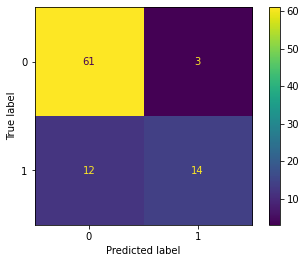

In [16]:
plot_confusion_matrix(model, X_test, y_test)  
plt.show()

* akurasi antara data training dan data tes

In [21]:
y_pred = model.predict(X_train)

y_pred

print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

Training set score: 0.8852
Test set score: 0.8333


* selanjutnya kita akan membuat model untuk decision tree yang menggunakann Sklearn

In [15]:
# Menerapkan decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier (max_depth=4)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

* Model tree
Setelah membuat model, selanjutnya membuat model tree yang sesuai dengan model yaitu ada sebanyak 4 layer

In [ ]:
dot_data= tree.export_graphviz(model, out_file=None,feature_names = feature_cols,
                               class_names=['1','0'],rounded=True,filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

* Hasil Klasifikasi Decision Tree
Setelah membuat model decision tree dan tree nya, kita bisa melihat hasil klasfikasi decision tree

In [20]:
from sklearn.metrics import classification_report
y_pred = model.predict (X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89        64
           1       0.82      0.54      0.65        26

    accuracy                           0.83        90
   macro avg       0.83      0.75      0.77        90
weighted avg       0.83      0.83      0.82        90



# PREDIKSI MODEL

In [22]:
input_data =(90,1,5643,1,40,1,265000,3,140,1,1,22)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

Prediction = model.predict(input_data_reshaped)

print(Prediction)

if (Prediction[0]== 0):
  print("Hidup")
if (Prediction[0]== 1):
  print("Meninggal")


[1]
Meninggal
